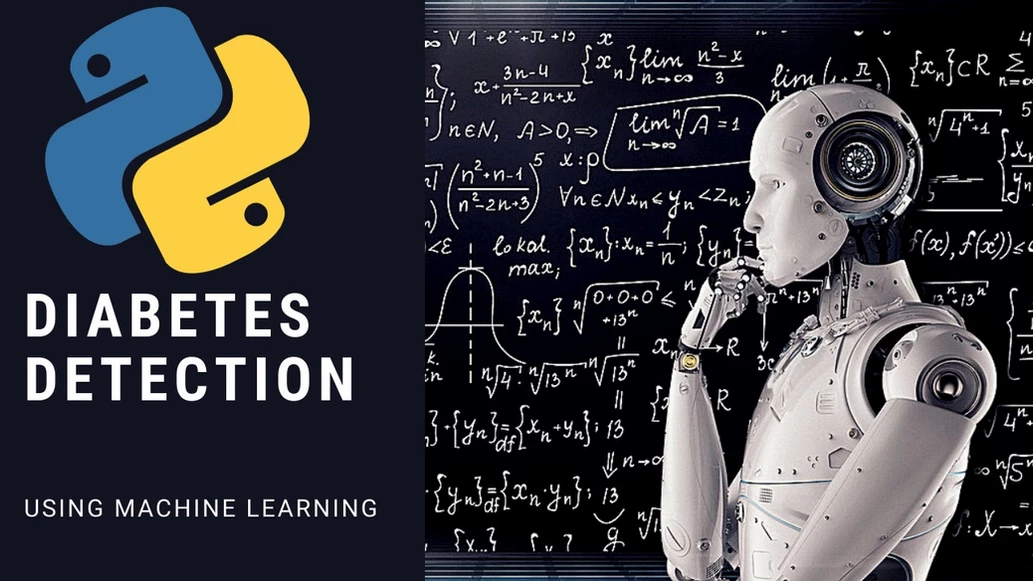

## <span style = "color:red;">Objective:</span>
###      * To predict a person as Diabetic or NOT based on given feature set. 
           

## <span style = "color:red;">Info about the dataset:</span>
#### **Pregnancies:** Number of times pregnant
#### **Glucose:** Plasma Glucose Concentration (mg/dl)
#### **Blood Pressure:** Diastolic Blood Pressure(mmHg)
#### **Skin Thickness:** A value used to estimate body fat.
#### **Insulin:** 2-Hour Serum Insulin (mu U/ml)
#### **BMI:** Body Mass Index (weight in kg/ height in m2)
#### **Diabetes Pedigree Function:** It provides information about diabetes history in relatives and    genetics. 
#### **Age:** Age (years)
#### **Outcome:** 0 = Diabetic, 1 = Not Diabetic.

## <span style = "color:red;">Highlights of the project:</span>
### * we will implement the project using multiple algorithms present in scikit-learn library.
### <span style = "color:blue;">* we will fill missing data using various approach, do check them out.</span>
### * we will be using Deep Learning later.
### * we will perform tuning operation, so as to try and improve our score.
### * we will perform basic model evaluation since the data is itself not that big and complicated.
### * I ll also implement this project using streamlit app and the link for the same ll be given.
### * Everything ll be in parts.

## <span style="color: red;">Part 1: Using Scikit-Learn</span>

   ### <span style = "color:#9176e8;">Part 1.1: Importing data and doing basic evaluation</span>

In [ ]:
## importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## importing data from my github where I have uploaded this same dataset:

## importing data with name "diabetes.csv"
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/yadavdeven/Regression_and_Classification_projects/main/datasets_for_projects/diabetes.csv","diabetes.csv")

## importing data
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

In [ ]:
df.shape,df.columns

In [ ]:
df.info()

In [ ]:
df.Outcome.value_counts()

In [ ]:
df.isnull().sum()

#### Though the above value_counts shows that the there isn't any missing values but that is not the case.
#### There many missing values in this small dataset, let's see HOW ???

   ### <span style = "color:#9176e8;">Though the above value_counts shows that the there isn't any missing values but that is not the case.</span>
   ### <span style = "color:#9176e8;">There many missing values in this small dataset, let's see HOW ???</span>

In [ ]:
## Creating a dataframe which shows how many zero values are present in each column:

column_name = []
zero_value_counts = []

for column in df.columns:
    num_zero_values = len(df[df[column] == 0])
    column_name.append(column)
    zero_value_counts.append(num_zero_values)
    df_zero_values = pd.DataFrame(list(zip(column_name,zero_value_counts)),columns = ["column","num of zero values"])

In [ ]:
df_zero_values

* #### Values such as BloodPressure, BMI etc can never be zero.
* #### This suggest us that missing values are being represented by zero in this dataset.

   ## <span style = "color:#9176e8;">Part 1.2: Filling Missing values (0 values for this dataset)</span>

In [ ]:
## looking at df_zero_values, let's fill columns with small numbers of missing values. 

## filling missing values for Glucose column:

df["Glucose"].mean(),df.Glucose.median()          ## mean = 121 and median = 117
df.Glucose = df.Glucose.replace(to_replace=0,value=120)   ## putting 120 for all 0 values

In [ ]:
## filling missing values for BloodPressure column:

df.BloodPressure.mean(),df.BloodPressure.median()    ## mean = 69 and median = 72
df.BloodPressure = df.BloodPressure.replace(to_replace=0,value=72)

In [ ]:
## filling missing values for BMI:

df["BMI"].mean(),df["BMI"].median()           ## both mean and median = 32
df["BMI"] = df["BMI"].replace(to_replace=0,value=32)

#### We won't be filling Pregnancies values because that can be zero and info of sex is not given.
#### So, we are left with complex columns of Insulin and SkinThickness which have huge missing values. 

In [ ]:
## Plotting Correlation matrix with Non-null Values:

df_non_null = df[(df["Insulin"] != 0) & (df["SkinThickness"] != 0)]     ## filtering rows with 0 values 

## plotting correlation matrix:

corr_matrix_non_null = df_non_null.corr()
plt.figure(figsize=(16,7),dpi=130)
sns.heatmap(corr_matrix_non_null,
           annot=True, annot_kws={'size': 15},
           linewidths = 0.5,
           fmt=".2f", cmap = "Blues")
plt.xticks(rotation = 45);

### <span style = "color: purple;">Inference from above correlation:</span> 
#### * There is a strong correlation between SkinThickness and BMI (0.66).
#### * There is a strong relation between Glucose and Insulin as well (0.58)
#### * The outcome is very much dependent on Glucose.
#### * Our further Filling  will be based on this inference.

In [ ]:
## removing warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.scatterplot(data=df_non_null, x = "SkinThickness", y = "BMI");

### <span style = "color: purple;">Approache to be used for Filling Remaing Missing values:</span> 
* #### we will fit a regression line between BMI and SkinThickness.
* #### we will than fill missing values of SkinThickness based on BMI values.
* #### Because median and mean approach doesn't make good sense with so many values missing.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
## filling missing values for SkinThickness based on BMI values:

## defining x and y and converting them in numpy arrays:
x = np.array(df_non_null["BMI"])
y = np.array(df_non_null["SkinThickness"])

## such reshaping is compulsory before fitting when we have only 1 feature:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

lr = LinearRegression()
lr.fit(x,y)

In [ ]:
## This will fill all missing(0 values) for SkinThickness. 
## uncomment print statement to see outputs:

for index,bmi_value in enumerate(df["BMI"]):
    if df["SkinThickness"][index] == 0:
        bmi_value = np.array(bmi_value)
        bmi_value = bmi_value.reshape(-1,1)
        st_pred = lr.predict(bmi_value)
        st_pred = st_pred.reshape(-1)
        st_pred = st_pred.item()
        ##print(bmi_value,st_pred,type(st_pred),df["SkinThickness"][index])
        
        df.at[index,"SkinThickness"] = st_pred    

In [ ]:
sns.scatterplot(df_non_null.Insulin,df_non_null.Glucose);

In [ ]:
## Repeating same thing for Glucose and Insulin:

df_insulin = df_non_null[df_non_null["Insulin"] < 400]  ## filtered high values of Insulin to get better fit line

X = np.array(df_insulin.Glucose)
Y = np.array(df_insulin.Insulin)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

lr.fit(X,Y)

In [ ]:
for index,glucose_value in enumerate(df["Glucose"]):
    if df["Insulin"][index] == 0:
        glucose_value = np.array(glucose_value)
        glucose_value = glucose_value.reshape(-1,1)
        Insu_pred = lr.predict(glucose_value)
        Insu_pred = Insu_pred.reshape(-1)
        Insu_pred = Insu_pred.item()
        ##print(bmi_value,st_pred,type(st_pred),df["SkinThickness"][index])
        
        df.at[index,"Insulin"] = st_pred    

In [ ]:
## Checking for 0 values:

column_name = []
zero_value_counts = []

for column in df.columns:
    num_zero_values = len(df[df[column] == 0])
    column_name.append(column)
    zero_value_counts.append(num_zero_values)
    df_zero_values_2 = pd.DataFrame(list(zip(column_name,zero_value_counts)),columns = ["column","num of zero values"])

In [ ]:
## All fine:

df_zero_values_2

   ## <span style = "color:#9176e8;">Part 1.3: IN DEPTH Data Visualisation with conclusions</span>

In [ ]:
## Correlation matrix for entire data with filled values:

corr_matrix = df.corr()
plt.figure(figsize=(16,7),dpi=130)
sns.heatmap(corr_matrix,
           annot=True, annot_kws={'size': 15},
           linewidths = 0.5,
           fmt=".2f", cmap = "Blues")
plt.xticks(rotation = 45);

### <span style = "color: purple;">Inference from above correlation:</span> 
#### * There is a strong correlation between Outcome and BMI which suggest obesity as some role to play.
#### * There is also good correlation between Outcome and Pregnancies.
#### * The outcome is very much dependent on Glucose since it show very high correlation.
#### * If we focus inside of the matrix than Glucose and insulin shows strong relation as well.
#### * Our further plotting will be based on this inference.

In [ ]:
## removing warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Visualizing effects of Glucose concentration on Outcome:

fig, axes = plt.subplots(1,2,figsize = (16,6), gridspec_kw={
                           'width_ratios': [5, 3],'wspace': 0.15},dpi = 120)

## code for distplot: 

sns.distplot(df['Glucose'][df.Outcome == 1],ax = axes[0],color = "red")
sns.distplot(df['Glucose'][df.Outcome == 0],ax = axes[0],color = "#aae9f0")
axes[0].legend(["Diabetes","No Diabetes"])

## code for boxplot:

sns.boxplot(x = "Outcome", y = "Glucose",data = df,ax = axes[1])
axes[1].legend(["0: No Diabetes","1: Diabetes"])

## I have used hexadecimal color values from color picker by googling it 
       ## You can access each figure within a plot by using artist[number]


mybox1 = axes[1].artists[0]      ## (selected 1st figure from plot 2 that is boxplot)
mybox1.set_facecolor('#aae9f0')

mybox2 = axes[1].artists[1]     ## (selected 2nd figure from plot 2 that is boxplot)
mybox2.set_facecolor('red')
##plt.tight_layout(pad = 2)
plt.suptitle("Impact of Plasma Glucose Level on Outcome",fontsize = 22);

### Both the figures gives a clear picture that people having high level of Plasma Glucose Concentration are very likely to have a Diabetes.

In [ ]:
## importing this library for drawing figures on a plot:

import matplotlib.patches as mpatches

In [ ]:
## Plotting effects of Glucose and insulin on Outcome:

sns.set_style("whitegrid")
plt.figure(figsize=(14,8))
ax = sns.scatterplot(data=df, x = "Glucose", y = "Insulin", hue = "Outcome",palette = "Set2")

## Setting custom labels:
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['No Diabetes', 'Diabetes'], loc='upper right')

plt.title("Impact of Glucose level and Insulin on Diabetes",{"fontsize":20},pad = 20)

## plotting a rectangle to highlight an area of interest:
rect=mpatches.Rectangle((150,-50),50,450, 
                        fill=False,
                        color="purple",
                       linewidth=2)
                       #facecolor="red")
plt.gca().add_patch(rect);

### This Scatter plot shows the impact of insulin along with plasma glucose concentration.
### The Rectangle box shows that people with high glucose plasma level and low insulin are almost certain to be Diabetic.

In [ ]:
## plotting impact of pregnancies on Outcome:

plt.figure(figsize=(12,6))
sns.set_style("white")
plt.title("Imapct of Pregnacy on Outcome",fontsize = 16,pad = 20)
sns.distplot(df['Pregnancies'][df.Outcome == 1], color ="red")
sns.distplot(df['Pregnancies'][df.Outcome == 0], color ="#aae9f0")
plt.legend(['Diabetes', 'No Diabetes']);

In [ ]:
## Visualizing effects of Glucose concentration on Outcome:

fig, axes = plt.subplots(1,2,figsize = (14,5),dpi = 120)

## code for 1st plot:

axes[0].set_title("Effect of BMI on Outcome",fontsize = 14,pad = 15)
sns.boxplot(x = "Outcome", y = "BMI",data = df,ax = axes[0])
axes[0].legend(["0: No Diabetes","Diabetes"])

## code for 2nd plot:

axes[1].set_title("Effect of AGE on Outcome",fontsize = 14,pad = 15)
sns.boxplot(x = "Outcome", y = "Age",data = df,ax = axes[1])
axes[1].legend(["0: No Diabetes","1: Diabetes"])


mybox0_0 = axes[0].artists[0]       ## selecting 1st figure from 1st plot and setting color as before
mybox0_0.set_facecolor('#c7fcd7')   ## and so on ...

mybox0_1 = axes[0].artists[1]  
mybox0_1.set_facecolor('red')
##plt.tight_layout(pad = 2)

mybox1_0 = axes[1].artists[0]
mybox1_0.set_facecolor('#aae9f0')

mybox1_1 = axes[1].artists[1]
mybox1_1.set_facecolor('red')
##plt.tight_layout(pad = 2);

   ## <span style = "color:#9176e8;">Part 1.3: Feature Scaling and Splitting of Data:</span>

In [ ]:
## imports for above processes:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
## splitting features and target:
x = df.drop("Outcome",axis = 1)
y = df.Outcome

In [ ]:
## splitting train and test data:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
## performing feature scaling:

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

   ## <span style = "color:#9176e8;">Part 1.4: Model Building:</span>

In [ ]:
## importing models:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

   ### Creating a function for Model fit and score:

In [ ]:
## putting models in a dictionary:

models = {"log_regression": LogisticRegression(),
          "random_forest": RandomForestClassifier(),
          "svc": SVC(kernel = "rbf")}

## creating function for fitting and scoring:

def fit_score(model,x_train,x_test,y_train,y_test):
    
    np.random.seed(0)             ## for reproducibility
    model_scores = {}
    
    for model_name, model in models.items():   ## ll take name and model from models dictionary 1 by1
        
        model.fit(x_train,y_train)    ## fit model 1 by 1 on training data
        model_scores[model_name] = model.score(x_test,y_test) ## append score in model_score dictionary
        
    return model_scores

In [ ]:
## importing score metrics before fitting:

from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
## fitting our base model:

model_scores = fit_score(model = models,
                         x_train = scaled_x_train, x_test = scaled_x_test,
                         y_train = y_train, y_test = y_test)

In [ ]:
## let's see the results:

model_scores

   ## <span style = "color:#9176e8;">BEAUTIFUL, Our Models are producing great results with l_r being the Best:</span>
* ### Seeing ml models train and produce results in one of the Best feelings.
* ### let's visualize this results for more awesomeness.

In [ ]:
df_model_scores = pd.DataFrame(model_scores,index = ["Accuracy"])
plt.figure(figsize = (8,6))
sns.barplot(x = df_model_scores.columns, y = df_model_scores.loc["Accuracy"])
plt.title("Model Scores Comparison",fontsize=20,pad = 25)
plt.xticks(fontsize = 16),plt.yticks(fontsize = 16),plt.ylabel("Accuracy",fontsize=16)

## code for plotting percentages on top of every bar

for index,data in enumerate(df_model_scores.loc["Accuracy"]):
  plt.text(x=index - 0.25,y=data+0.01,s=f"{data*100:.2f}%",fontsize = 14);

   ## <span style = "color:#9176e8;">Part 1.5: Model Evaluation:</span>

### Classification Report:

In [ ]:
## classification report:

def get_classification_report(model,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test):
    np.random.seed(0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))

In [ ]:
for model_name, model in models.items():
    print(f'Classification Report for {model_name}')
    get_classification_report(model=model)

### ROC curve:

In [ ]:
def get_roc_curve(model,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test):
    np.random.seed(0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    plot_roc_curve(model,x_test,y_test)

In [ ]:
for model_name, model in models.items():
    get_roc_curve(model)
    plt.title(f'ROC_curve for {model_name}');

### Confusion Matrix:

In [ ]:
def get_confusion_matrix(model,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test):
    np.random.seed(0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    return confusion_matrix

In [ ]:
for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}:")
    get_confusion_matrix(model);

### Confusion Matrix is rather confusing us.
### So, Let's Plot this results using Heatmap and add Percentage to it for Better Understanding.

In [ ]:
## Heatmap for Logistic Regression Model:

lr = LogisticRegression()
lr.fit(scaled_x_train,y_train)
y_pred = lr.predict(scaled_x_test)
cf_matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap="Greens",annot_kws={'size':16})
plt.xlabel("Predicted Label",fontsize = 18)
plt.ylabel("True Label",fontsize = 18);

In [ ]:
## Heatmap for Random Forest Classifier Model:

rf = RandomForestClassifier()
rf.fit(scaled_x_train,y_train)
y_pred = rf.predict(scaled_x_test)
cf_matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='YlGnBu',annot_kws={'size':16})
plt.xlabel("Predicted Label",fontsize = 18)
plt.ylabel("True Label",fontsize = 18);

In [ ]:
## Heatmap for SVC Model:

svc = SVC(kernel = "rbf")
svc.fit(scaled_x_train,y_train)
y_pred = svc.predict(scaled_x_test)
cf_matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='BuPu',annot_kws={'size':16})
plt.xlabel("Predicted Label",fontsize = 18)
plt.ylabel("True Label",fontsize = 18);

   ## <span style = "color:#9176e8;">Part 1.6: Model Tuning:</span>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
## param grid for tuning logistic regression model: 

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(0,10, 20),'l1_ratio': np.linspace(0,1,20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [5000]
    }
]

In [ ]:
## injecting paramgrid into the model: 

classifier = GridSearchCV(LogisticRegression(),param_grid=param_grid,verbose=True,n_jobs=-1,cv=3)

In [ ]:
tuned_log_regression = classifier.fit(scaled_x_train,y_train)

In [ ]:
## our BEST params:
tuned_log_regression.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = tuned_log_regression.predict(scaled_x_test)
score = accuracy_score(y_pred,y_test)
score

### Tuning Logistic model produced no improvement, let's do it for SVC...

In [ ]:
## rbf kernel is best suited for this type of data also c = 0.1 works best in most cases
## Hence, tuning for gamma values

gammas = [0.1, 1, 10, 100]
svc_scores = []
for gamma in gammas:
   svc = SVC(kernel="rbf", gamma=gamma,C=0.1).fit(scaled_x_train, y_train)
   svc_scores.append(svc.score(scaled_x_test,y_test))
   

In [ ]:
max(svc_scores)

### So, we got an improvement of (79.87 - 77.27) = <span style = "color:green;">2.6 %</span>

* ## <span style="color: #9176e8;">Please upvote, if you found this helpful</span>
* ## <span style="color: #9176e8;">For any doubts do comment will try my best to solve it</span>
## <span style="color: #9176e8;">THANKS...</span>

In [ ]:
## PART 2: Predicting using Deep Learning

## will be updating soon ....

In [ ]:
## PART 3: Model Deployment using Streamlit

## will be updating soon....